# Decision Tree Regression

## Objective

Understand how regression trees partition feature space
and why they produce piecewise constant predictions.

We analyze:

- Mean Squared Error (MSE) splitting
- Piecewise constant outputs
- Underfitting vs overfitting
- Bias–variance behavior

## Mathematical Foundations

Regression trees choose splits that minimize
Mean Squared Error (MSE).

For a node:

MSE = Σ (yᵢ − ŷ_node)²

Where:

ŷ_node = mean(yᵢ in node)

At each split, the algorithm chooses the feature and threshold
that minimize the weighted average MSE of the child nodes.

Important insight:

Each leaf predicts the mean target value in that region.
Therefore, regression trees produce piecewise constant functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

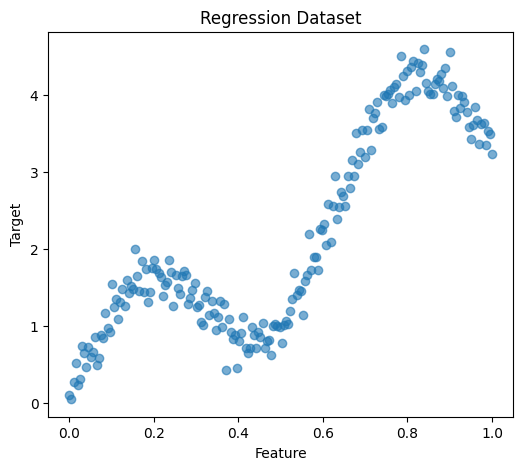

In [2]:
np.random.seed(42)

X = np.linspace(0, 1, 200).reshape(-1, 1)
y = 4 * X + np.sin(10 * X) + np.random.randn(200, 1) * 0.2

plt.figure(figsize=(6, 5))
plt.scatter(X, y, alpha=0.6)
plt.title("Regression Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

### Interpretation

The dataset contains:

- A linear trend
- Nonlinear sinusoidal component
- Random noise

This allows us to evaluate how tree depth affects
model flexibility and variance.

## Shallow Tree Regression (Underfitting)


In [3]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_le

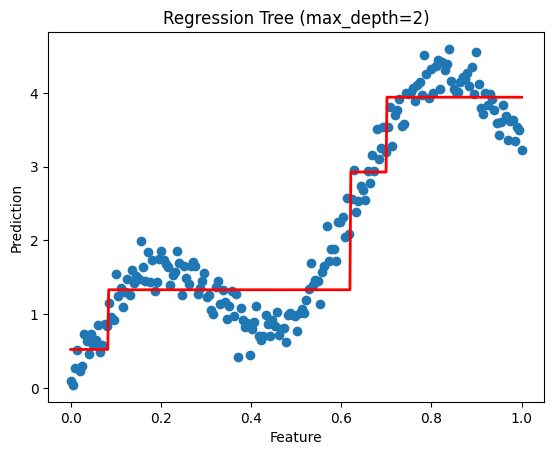

In [4]:
X_grid = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(X_grid)

plt.scatter(X, y)
plt.plot(X_grid, y_pred, color="red", linewidth=2, linestyle="-")
plt.title("Regression Tree (max_depth=2)")
plt.xlabel("Feature")
plt.ylabel("Prediction")
plt.show()

### Interpretation

The shallow tree creates large regions and flat predictions.

This results in:

- High bias
- Underfitting
- Inability to capture nonlinear structure

# Deep Tree Regression (Overfitting)

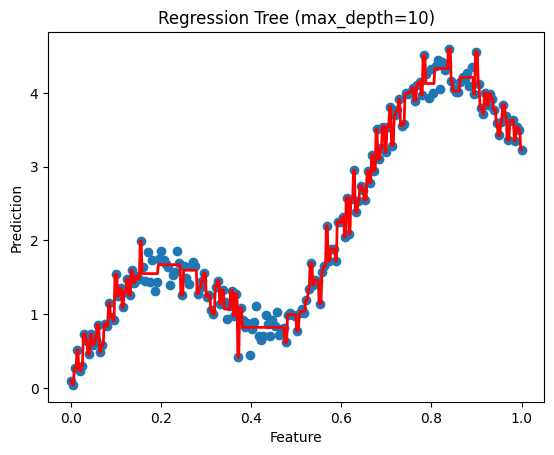

In [5]:
tree_reg_deep = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg_deep.fit(X, y)

y_pred_deep = tree_reg_deep.predict(X_grid)

plt.scatter(X, y)
plt.plot(X_grid, y_pred_deep, color="red", linewidth=2, linestyle="-")
plt.title("Regression Tree (max_depth=10)")
plt.xlabel("Feature")
plt.ylabel("Prediction")
plt.show()


### Interpretation

The deep tree:

- Creates many small regions
- Fits noise fluctuations
- Produces jagged predictions

This represents:

- Low bias
- High variance
- Risk of overfitting

# Train/Test Error Analysis

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

tree_reg_deep.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, tree_reg_deep.predict(X_train))
test_mse = mean_squared_error(y_test, tree_reg_deep.predict(X_test))

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.0041628337435069785
Test MSE: 0.0801462045711958


### Interpretation

If training error is much lower than test error,
the model is overfitting.

Deep trees typically show:

Low training MSE  
Higher test MSE  

This instability motivates ensemble methods
such as Random Forest.

## Bias–Variance Behavior

- Shallow tree → High bias, low variance
- Deep tree → Low bias, high variance

Decision trees are non-parametric models whose
complexity grows with depth.

They partition the input space and predict
the average target in each region.

## Engineering Takeaways

- Regression trees do not produce smooth curves.
- Predictions are region-wise averages.
- Trees cannot extrapolate beyond training targets.
- Model complexity must be controlled.
- Ensembles reduce tree instability.

# Decision Tree vs Linear Regression

To better understand regression trees, we compare them
with a parametric model: Linear Regression.

Key difference:

- Linear Regression → smooth global function
- Decision Tree → piecewise constant local regions

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


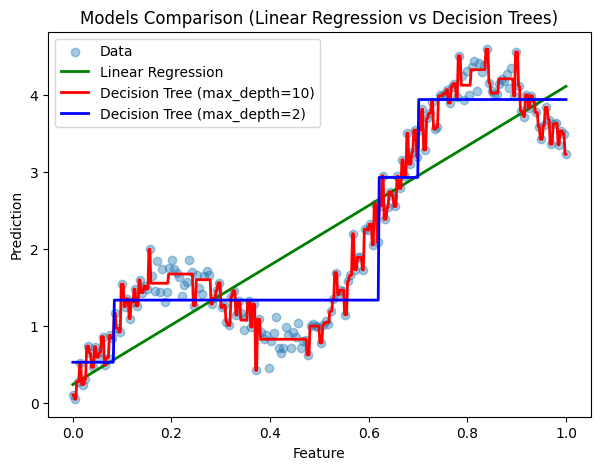

In [10]:
y_pred_linear = lin_reg.predict(X_grid)

plt.figure(figsize=(7, 5))

plt.scatter(X, y, alpha=0.4, label='Data')
plt.plot(X_grid, y_pred_linear, color='green', linewidth=2, label='Linear Regression')
plt.plot(X_grid, y_pred_deep, color='red', linewidth=2, label='Decision Tree (max_depth=10)')
plt.plot(X_grid, y_pred, color='blue', linewidth=2, label='Decision Tree (max_depth=2)')

plt.title("Models Comparison (Linear Regression vs Decision Trees)")
plt.xlabel("Feature")
plt.ylabel("Prediction")
plt.legend()
plt.show()

## Interpretation

Linear Regression:

- Produces a smooth global line.
- Assumes linear relationship.
- Can extrapolate beyond training range.
- Low variance, potentially high bias.

Decision Tree:

- Produces step-like predictions.
- No assumption about global functional form.
- Cannot extrapolate beyond observed target values.
- High variance if deep.

Key Insight:

Linear regression models relationships globally.
Decision trees model relationships locally.

# Extrapolation of Prediction

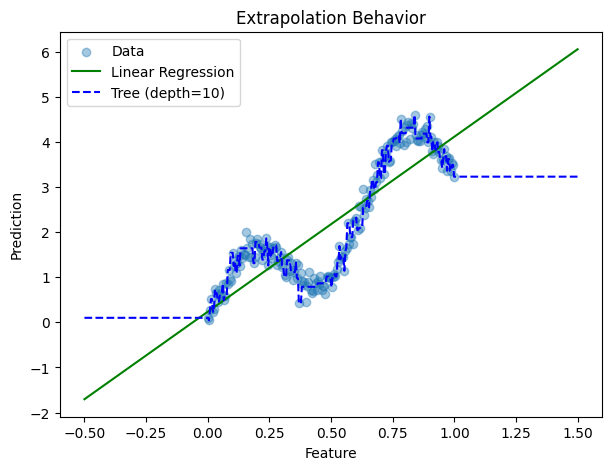

In [12]:
X_extended = np.linspace(-0.5, 1.5, 500).reshape(-1, 1)

plt.figure(figsize=(7, 5))
plt.scatter(X, y, alpha=0.4, label="Data")

plt.plot(X_extended, lin_reg.predict(X_extended),
         color="green", label="Linear Regression")

plt.plot(X_extended, tree_reg_deep.predict(X_extended),
         color="blue", linestyle="--", label="Tree (depth=10)")

plt.title("Extrapolation Behavior")
plt.xlabel("Feature")
plt.ylabel("Prediction")
plt.legend()
plt.show()

## Extrapolation Insight

Linear Regression:

- Continues the learned trend beyond training data.
- Can predict values outside observed target range.

Decision Tree:

- Cannot extrapolate.
- Predictions remain bounded within
  the range of training targets.
- Produces flat regions outside observed domain.

This limitation is fundamental to tree-based models.

## Conceptual Comparison

| Model | Type | Bias | Variance | Extrapolation |
|-------|------|------|----------|--------------|
| Linear Regression | Parametric | Higher | Low | Yes |
| Decision Tree | Non-parametric | Low (deep) | High | No |

Takeaway:

- Trees are flexible but unstable.
- Linear models are stable but restrictive.
- Ensemble methods combine flexibility with stability.